# COVID-19 팬데믹 추정

## 데이터 로드

우리는 [Johns Hopkins University](https://jhu.edu/)의 [Center for Systems Science and Engineering](https://systems.jhu.edu/) (CSSE)에서 제공하는 COVID-19 감염자 데이터를 사용할 것입니다. 데이터셋은 [이 GitHub 저장소](https://github.com/CSSEGISandData/COVID-19)에서 확인할 수 있습니다.


In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3) # make figures larger

우리는 `pd.read_csv`를 사용하여 GitHub에서 가장 최근 데이터를 직접 로드할 수 있습니다. 어떤 이유로 데이터가 사용 불가능한 경우, 항상 `data` 폴더에 로컬로 저장된 복사본을 사용할 수 있습니다 - 아래에서 `base_url`을 정의하는 줄의 주석을 해제하기만 하면 됩니다:


In [125]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [126]:
infected = pd.read_csv(infected_dataset_url)
infected.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
0        0        0        0        0  ...   152448   152448   152448   
1        0        0        0        0  ...   138132   138790   139324   
2        0        0        0        0  ...   190656   191171   191583   
3        0        0        0        0  ...    14988    14988    14988   
4        0        0        0        0  ...    45583    45817    45945   

   8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  8/29/21  
0   152583   152660   152722   152822   152960   152960   152960  
1   139721   140521   141365   142253   143174   144079   144847  
2   192089   192626   193171   193674   194186   194671   195162  
3    15002    15003    15014    15016    15025    15025    15025  
4    46076    46340    46539    46726    46929    47079    47168  

[5 rows x 590 columns]

우리는 표의 각 행이 각 국가 및/또는 지방의 감염자 수를 정의하며, 열은 날짜에 해당한다는 것을 알 수 있습니다. 회복자 수나 사망자 수와 같은 다른 데이터에 대해서도 유사한 표를 불러올 수 있습니다.


In [127]:
recovered = pd.read_csv(recovered_dataset_url)
deaths = pd.read_csv(deaths_dataset_url)

## 데이터 이해하기

위 표에서 `Province/State` 열의 역할이 명확하지 않습니다. `Province/State` 열에 있는 다양한 값을 살펴보겠습니다:


In [128]:
infected['Province/State'].value_counts()

Australian Capital Territory    1
Xinjiang                        1
Martinique                      1
Guadeloupe                      1
French Polynesia                1
                               ..
Fujian                          1
Chongqing                       1
Beijing                         1
Anhui                           1
Turks and Caicos Islands        1
Name: Province/State, Length: 87, dtype: int64

In [129]:
infected[infected['Country/Region']=='China']

Province/State Country/Region      Lat      Long  1/22/20  1/23/20  \
58           Anhui          China  31.8257  117.2264        1        9   
59         Beijing          China  40.1824  116.4142       14       22   
60       Chongqing          China  30.0572  107.8740        6        9   
61          Fujian          China  26.0789  117.9874        1        5   
62           Gansu          China  35.7518  104.2861        0        2   
63       Guangdong          China  23.3417  113.4244       26       32   
64         Guangxi          China  23.8298  108.7881        2        5   
65         Guizhou          China  26.8154  106.8748        1        3   
66          Hainan          China  19.1959  109.7453        4        5   
67           Hebei          China  39.5490  116.1306        1        1   
68    Heilongjiang          China  47.8620  127.7615        0        2   
69           Henan          China  37.8957  114.9042        5        5   
70       Hong Kong          China  22.3000  114.2000        0        2   
71           Hubei          China  30.9756  112.2707      444      444   
72           Hunan          China  27.6104  111.7088        4        9   
73  Inner Mongolia          China  44.0935  113.9448        0        0   
74         Jiangsu          China  32.9711  119.4550        1        5   
75         Jiangxi          China  27.6140  115.7221        2        7   
76           Jilin          China  43.6661  126.1923        0        1   
77        Liaoning          China  41.2956  122.6085        2        3   
78           Macau          China  22.1667  113.5500        1        2   
79         Ningxia          China  37.2692  106.1655        1        1   
80         Qinghai          China  35.7452   95.9956        0        0   
81         Shaanxi          China  35.1917  108.8701        0        3   
82        Shandong          China  36.3427  118.1498        2        6   
83        Shanghai          China  31.2020  121.4491        9       16   
84          Shanxi          China  37.5777  112.2922        1        1   
85         Sichuan          China  30.6171  102.7103        5        8   
86         Tianjin          China  39.3054  117.3230        4        4   
87           Tibet          China  31.6927   88.0924        0        0   
88         Unknown          China      NaN       NaN        0        0   
89        Xinjiang          China  41.1129   85.2401        0        2   
90          Yunnan          China  24.9740  101.4870        1        2   
91        Zhejiang          China  29.1832  120.0934       10       27   

    1/24/20  1/25/20  1/26/20  1/27/20  ...  8/20/21  8/21/21  8/22/21  \
58       15       39       60       70  ...     1008     1008     1008   
59       36       41       68       80  ...     1112     1113     1115   
60       27       57       75      110  ...      603      603      603   
61       10       18       35       59  ...      780      780      780   
62        2        4        7       14  ...      199      199      199   
63       53       78      111      151  ...     3001     3007     3012   
64       23       23       36       46  ...      289      289      289   
65        3        4        5        7  ...      147      147      147   
66        8       19       22       33  ...      190      190      190   
67        2        8       13       18  ...     1317     1317     1317   
68        4        9       15       21  ...     1614     1614     1614   
69        9       32       83      128  ...     1521     1522     1523   
70        2        5        8        8  ...    12049    12052    12057   
71      549      761     1058     1423  ...    68287    68289    68289   
72       24       43       69      100  ...     1181     1181     1181   
73        1        7        7       11  ...      412      412      412   
74        9       18       33       47  ...     1583     1584     1584   
75       18       18       36       72  ...      937      937      937   
76     

## 데이터 전처리

우리는 국가를 더 작은 지역으로 나누는 것에 관심이 없으므로, 먼저 이러한 세분화를 제거하고 모든 지역 정보를 합산하여 전체 국가에 대한 정보를 얻습니다. 이는 `groupby`를 사용하여 수행할 수 있습니다:


In [130]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                            
Afghanistan     33.93911  67.709953        0        0        0        0   
Albania         41.15330  20.168300        0        0        0        0   
Algeria         28.03390   1.659600        0        0        0        0   
Andorra         42.50630   1.521800        0        0        0        0   
Angola         -11.20270  17.873900        0        0        0        0   

                1/26/20  1/27/20  1/28/20  1/29/20  ...  8/20/21  8/21/21  \
Country/Region                                      ...                     
Afghanistan           0        0        0        0  ...   152448   152448   
Albania               0        0        0        0  ...   138132   138790   
Algeria               0        0        0        0  ...   190656   191171   
Andorra               0        0        0        0  ...    14988    14988   
Angola                0        0        0        0  ...    45583    45817   

                8/22/21  8/23/21  8/24/21  8/25/21  8/26/21  8/27/21  8/28/21  \
Country/Region                                                                  
Afghanistan      152448   152583   152660   152722   152822   152960   152960   
Albania          139324   139721   140521   141365   142253   143174   144079   
Algeria          191583   192089   192626   193171   193674   194186   194671   
Andorra           14988    15002    15003    15014    15016    15025    15025   
Angola            45945    46076    46340    46539    46726    46929    47079   

                8/29/21  
Country/Region           
Afghanistan      152960  
Albania          144847  
Algeria          195162  
Andorra           15025  
Angola            47168  

[5 rows x 588 columns]

당신은 `groupby`를 사용함으로 인해 모든 데이터프레임이 이제 국가/지역별로 인덱싱된 것을 볼 수 있습니다. 따라서 `.loc`를 사용하여 특정 국가의 데이터를 접근할 수 있습니다:|


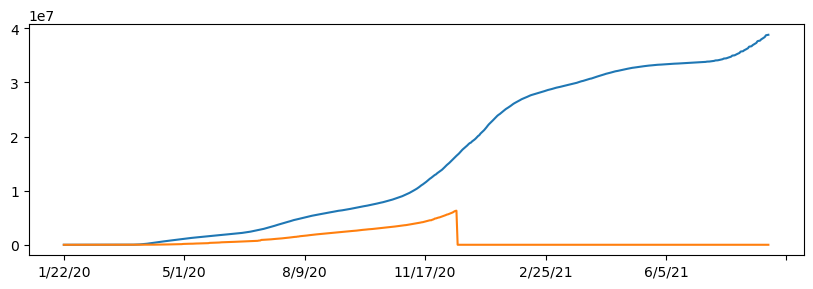

In [131]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()

> **참고** `[2:]`를 사용하여 국가의 지리적 위치를 포함하는 시퀀스의 처음 두 요소를 제거하는 방법을 확인하세요. 우리는 또한 그 두 열을 완전히 제거할 수 있습니다:


In [132]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

## 데이터 조사

이제 특정 국가를 조사해 보겠습니다. 날짜를 기준으로 감염 데이터를 포함하는 프레임을 만들어 봅시다:


In [133]:
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)
    return df

df = mkframe('US')
df

infected  recovered  deaths
2020-01-22         1          0       0
2020-01-23         1          0       0
2020-01-24         2          0       0
2020-01-25         2          0       0
2020-01-26         5          0       0
...              ...        ...     ...
2021-08-25  38223029          0  632272
2021-08-26  38384360          0  633564
2021-08-27  38707294          0  636720
2021-08-28  38760363          0  637254
2021-08-29  38796746          0  637531

[586 rows x 3 columns]

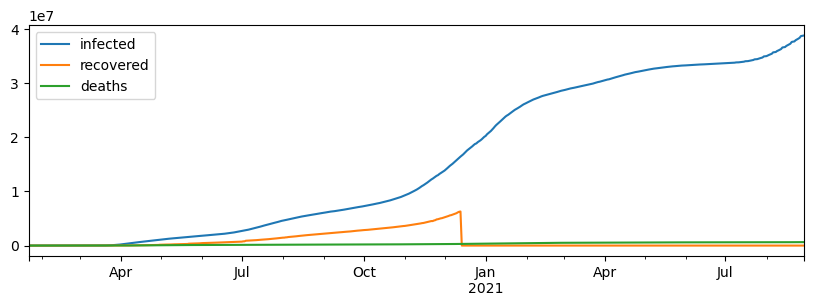

In [134]:
df.plot()
plt.show()

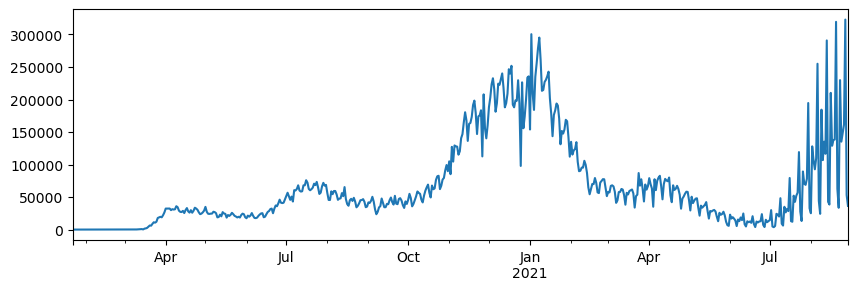

In [135]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

데이터에서 큰 변동을 볼 수 있습니다. 한 달을 자세히 살펴봅시다:


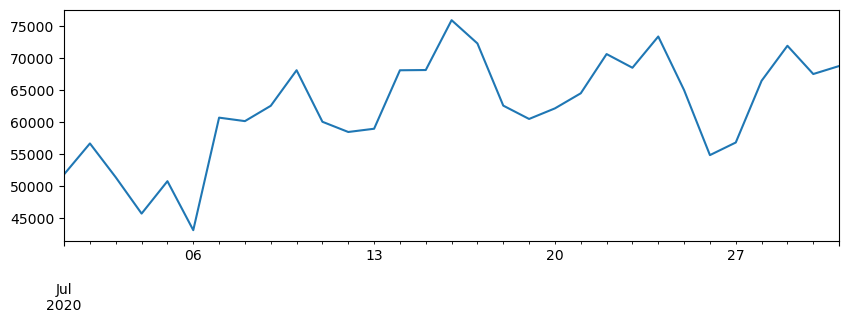

In [136]:
df[(df.index.year==2020) & (df.index.month==7)]['ninfected'].plot()
plt.show()

데이터에 주간 변동이 있는 것으로 보입니다. 추세를 확인할 수 있도록 곡선을 완화하는 것이 합리적이며, 이를 위해 이동 평균을 계산합니다 (즉, 각 날짜에 대해 이전 여러 날의 평균 값을 계산합니다):


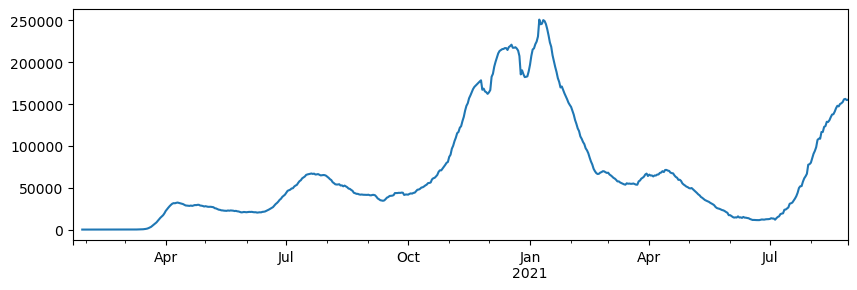

In [137]:
df['ninfav'] = df['ninfected'].rolling(window=7).mean()
df['ninfav'].plot()
plt.show()

여러 국가를 비교할 수 있도록 하기 위해, 우리는 해당 국가의 인구를 고려하고 국가 인구 대비 감염된 개인의 비율을 비교하고자 할 수 있습니다. 국가의 인구를 얻기 위해, 국가 데이터셋을 로드해 봅시다.


In [138]:
countries = pd.read_csv(countries_dataset_url)
countries

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0            4   AF  AFG    4.0      NaN         NaN            NaN   
1            8   AL  ALB    8.0      NaN         NaN            NaN   
2           12   DZ  DZA   12.0      NaN         NaN            NaN   
3           20   AD  AND   20.0      NaN         NaN            NaN   
4           24   AO  AGO   24.0      NaN         NaN            NaN   
...        ...  ...  ...    ...      ...         ...            ...   
4191  84056037   US  USA  840.0  56037.0  Sweetwater        Wyoming   
4192  84056039   US  USA  840.0  56039.0       Teton        Wyoming   
4193  84056041   US  USA  840.0  56041.0       Uinta        Wyoming   
4194  84056043   US  USA  840.0  56043.0    Washakie        Wyoming   
4195  84056045   US  USA  840.0  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_             Combined_Key  \
0       Afghanistan  33.939110   67.709953              Afghanistan   
1           Albania  41.153300   20.168300                  Albania   
2           Algeria  28.033900    1.659600                  Algeria   
3           Andorra  42.506300    1.521800                  Andorra   
4            Angola -11.202700   17.873900                   Angola   
...             ...        ...         ...                      ...   
4191             US  41.659439 -108.882788  Sweetwater, Wyoming, US   
4192             US  43.935225 -110.589080       Teton, Wyoming, US   
4193             US  41.287818 -110.547578       Uinta, Wyoming, US   
4194             US  43.904516 -107.680187    Washakie, Wyoming, US   
4195             US  43.839612 -104.567488      Weston, Wyoming, US   

      Population  
0     38928341.0  
1      2877800.0  
2     43851043.0  
3        77265.0  
4     32866268.0  
...          ...  
4191     42343.0  
4192     23464.0  
4193     20226.0  
4194      7805.0  
4195      6927.0  

[4196 rows x 12 columns]

이 데이터셋에는 국가와 주에 대한 정보가 모두 포함되어 있으므로, 전체 국가의 인구를 얻으려면 약간의 기지가 필요합니다:


In [139]:
countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]

UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region   Lat  \
790  840   US  USA  840.0   NaN    NaN            NaN             US  40.0   

     Long_ Combined_Key   Population  
790 -100.0           US  329466283.0

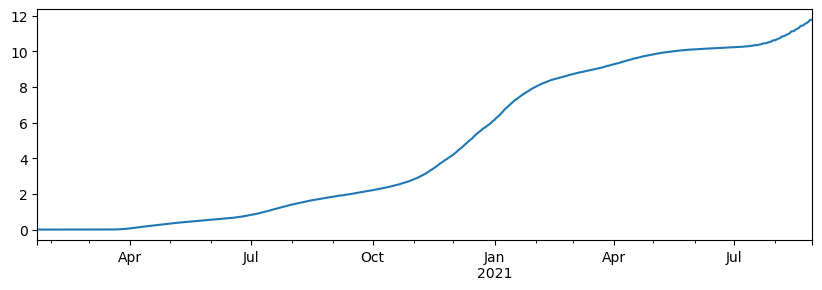

In [140]:
pop = countries[(countries['Country_Region']=='US') & countries['Province_State'].isna()]['Population'].iloc[0]
df['pinfected'] = df['infected']*100 / pop
df['pinfected'].plot(figsize=(10,3))
plt.show()

## $R_t$ 계산하기

질병의 전염성을 확인하기 위해 우리는 **기본 재생산 수** $R_0$를 살펴봅니다. $R_0$는 감염된 사람이 추가로 감염시킬 수 있는 사람의 수를 나타냅니다. $R_0$가 1보다 크면, 전염병이 확산될 가능성이 높습니다.

$R_0$는 질병 자체의 특성이며, 사람들이 팬데믹을 늦추기 위해 취할 수 있는 보호 조치를 고려하지 않습니다. 팬데믹 진행 중에는 특정 시점 $t$에서 재생산 수 $R_t$를 추정할 수 있습니다. 이 값은 대략적으로 8일의 기간을 기준으로 추정할 수 있으며, 다음과 같이 계산됩니다: $$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$
여기서 $I_t$는 $t$일에 새로 감염된 사람의 수를 나타냅니다.

우리의 팬데믹 데이터를 사용하여 $R_t$를 계산해 봅시다. 이를 위해 8개의 `ninfected` 값을 포함하는 이동 창을 사용하고, 위의 비율을 계산하는 함수를 적용합니다:


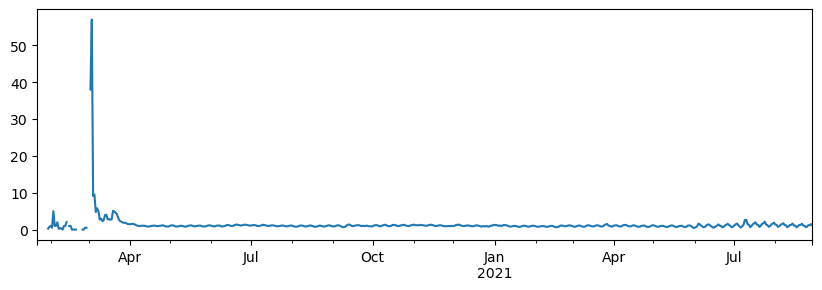

In [141]:
df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
df['Rt'].plot()
plt.show()

그래프에 몇몇 간격이 있는 것을 볼 수 있습니다. 이는 데이터셋에 `NaN` 또는 `inf` 값이 존재하기 때문에 발생할 수 있습니다. `inf`는 0으로 나누는 연산으로 인해 발생할 수 있으며, `NaN`은 누락된 데이터나 결과를 계산할 데이터가 없는 경우(예: 프레임의 아주 초반부에서, 너비 8의 롤링 윈도우가 아직 사용 가능하지 않은 경우)를 나타낼 수 있습니다. 그래프를 더 보기 좋게 만들기 위해, 이러한 값들을 `replace`와 `fillna` 함수를 사용하여 채워야 합니다.

이제 팬데믹 초기 상황을 더 자세히 살펴보겠습니다. y축 값을 6 이하로 제한하여 더 잘 보이도록 하고, y=1에 수평선을 그리겠습니다.


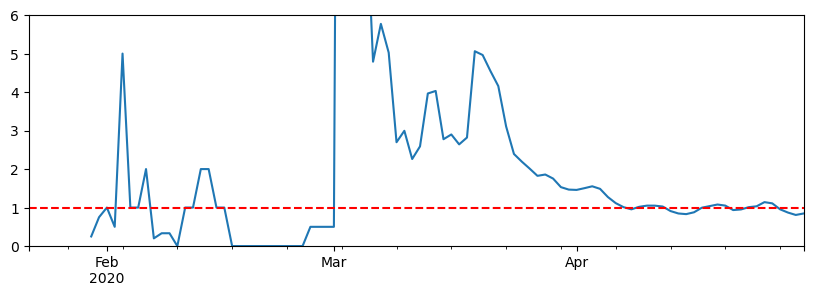

In [142]:
ax = df[df.index<"2020-05-01"]['Rt'].replace(np.inf,np.nan).fillna(method='pad').plot(figsize=(10,3))
ax.set_ylim([0,6])
ax.axhline(1,linestyle='--',color='red')
plt.show()

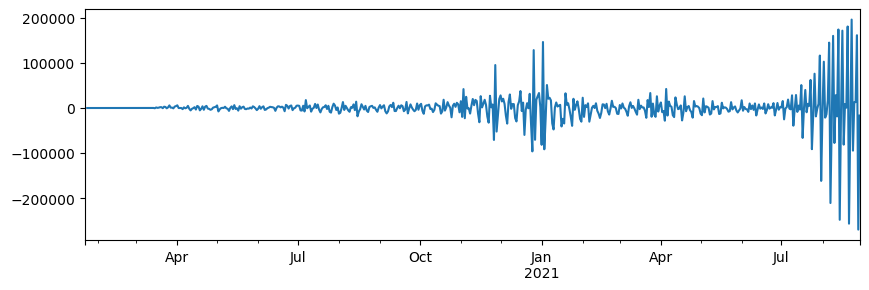

In [143]:
df['ninfected'].diff().plot()
plt.show()

데이터 보고로 인해 많은 변동이 발생한다는 점을 고려할 때, 전체적인 그림을 얻기 위해 이동 평균을 실행하여 곡선을 완화하는 것이 합리적입니다. 다시 팬데믹 초기 몇 달에 초점을 맞춰봅시다:


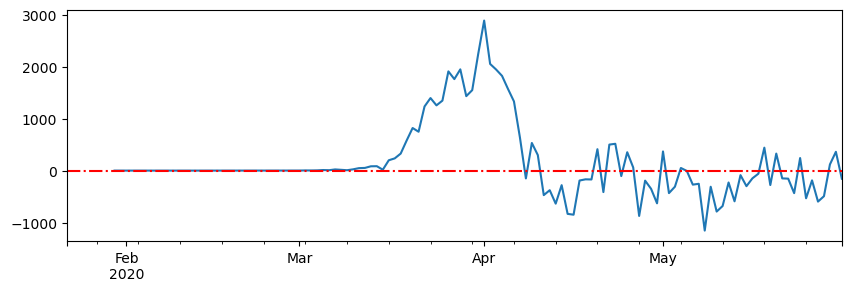

In [150]:
ax=df[df.index<"2020-06-01"]['ninfected'].diff().rolling(7).mean().plot()
ax.axhline(0,linestyle='-.',color='red')
plt.show()

## 도전 과제

이제 코드와 데이터를 더 다뤄볼 차례입니다! 다음은 실험해볼 수 있는 몇 가지 제안입니다:
* 여러 나라에서 팬데믹의 확산 양상을 살펴보세요.
* 여러 나라의 $R_t$ 그래프를 하나의 그래프에 비교해서 그리거나, 여러 그래프를 나란히 만들어보세요.
* 사망자 수와 회복자 수가 감염자 수와 어떻게 상관관계가 있는지 확인해보세요.
* 감염률과 사망률을 시각적으로 비교하여 일반적인 질병이 얼마나 오래 지속되는지 알아보세요. 이 과정에서 이상치를 찾아야 할 수도 있습니다. 이를 알아내기 위해 여러 나라의 데이터를 살펴보세요.
* 치명률을 계산하고 시간이 지남에 따라 어떻게 변하는지 확인해보세요. 계산을 하기 전에 질병의 지속 기간(일 단위)을 고려하여 한 시계열 데이터를 다른 시계열 데이터보다 시간적으로 이동시켜야 할 수도 있습니다.


## 참고 자료

COVID 전염병 확산에 대한 추가 연구는 다음 출판물에서 확인할 수 있습니다:
* [COVID 팬데믹 동안 Rt 추정을 위한 Sliding SIR 모델](https://soshnikov.com/science/sliding-sir-model-for-rt-estimation/), [Dmitry Soshnikov](http://soshnikov.com)의 블로그 게시물
* T.Petrova, D.Soshnikov, A.Grunin. [글로벌 COVID-19 발병에 대한 시간 의존적 재생산 수 추정](https://www.preprints.org/manuscript/202006.0289/v1). *Preprints* **2020**, 2020060289 (doi: 10.20944/preprints202006.0289.v1)
* [위 논문의 GitHub 코드](https://github.com/shwars/SlidingSIR)



---

**면책 조항**:  
이 문서는 AI 번역 서비스 [Co-op Translator](https://github.com/Azure/co-op-translator)를 사용하여 번역되었습니다. 정확성을 위해 최선을 다하고 있지만, 자동 번역에는 오류나 부정확성이 포함될 수 있습니다. 원본 문서의 원어 버전이 권위 있는 출처로 간주되어야 합니다. 중요한 정보의 경우, 전문적인 인간 번역을 권장합니다. 이 번역 사용으로 인해 발생하는 오해나 잘못된 해석에 대해 책임을 지지 않습니다.
